# DTSC670: Foundations of Machine Learning Models
## Module 2
## Assignment 3: Multiple Linear Regression

#### Name: Bethlehem Alem

The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [98]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [3]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"
mr =pd.read_csv(fileName)
mr

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
...,...,...,...
70,18.068038,16.252976,396.115249
71,2.749494,3.433744,68.351161
72,2.785527,2.817559,58.948555
73,16.147826,16.344096,382.447605


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

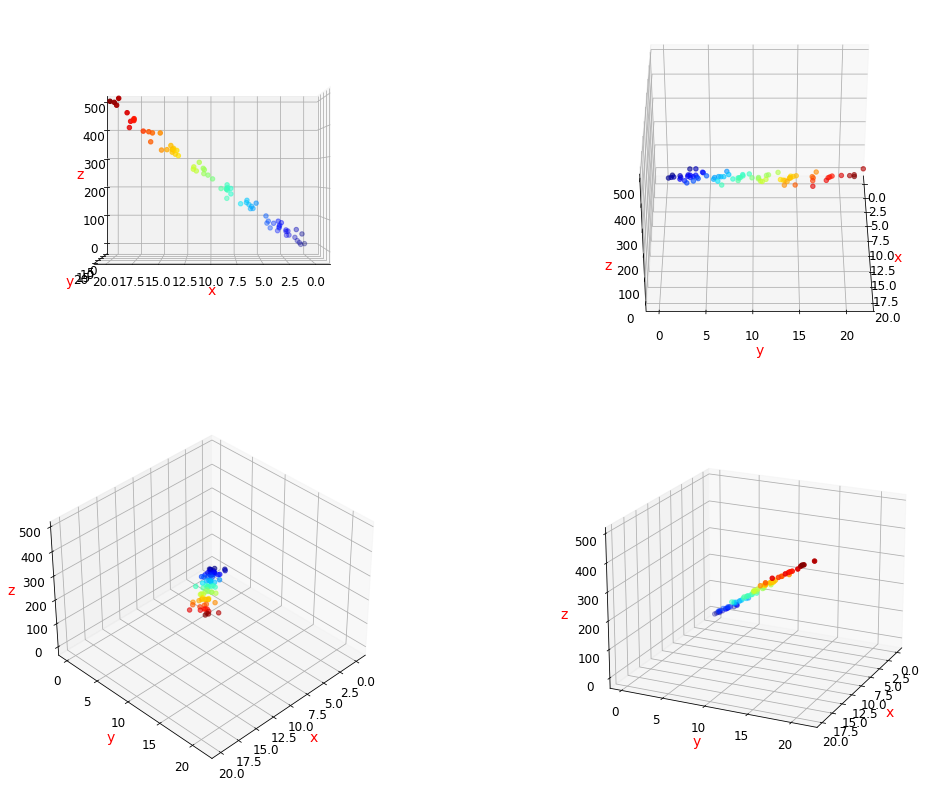

In [266]:
from mpl_toolkits.mplot3d import Axes3D


x = mr[['x']]
y = mr[['y']]
z = mr[['z']]
# Creating figure
fig = plt.figure(figsize = (18, 14
                           ))

   
ax.grid(b = True, color ='gray', linestyle ='-.', linewidth = 0.3, alpha = 0.2)


# Creating color map
 
# First plot
ax1 = fig.add_subplot(2,2,1,projection ="3d")
sctt = ax1.scatter3D(x, y, z, c = np.array(x) , cmap= 'jet')

 
ax1.set_xlabel('x', color = 'red')
ax1.set_ylabel('y', color = 'red')
ax1.set_zlabel('z', color = 'red')

ax1.view_init(0, 90)

ax.grid(b = True, color ='gray', linestyle ='-.', linewidth = 0.3, alpha = 0.2)

 

#---- Second subplot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
sctt2 = ax2.scatter3D(x, y, z,alpha = 0.6, c = np.array(x) , cmap= 'jet')

 
ax2.set_xlabel('x', color = 'red')
ax2.set_ylabel('y', color = 'red')
ax2.set_zlabel('z', color = 'red')

ax2.view_init(36.5, 0 )

#---- Third subplot
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
sctt3 = ax3.scatter3D(x, y, z,alpha = 0.6,c = np.array(x) , cmap= 'jet')

ax3.set_xlabel('x', color = 'red')
ax3.set_ylabel('y', color = 'red')
ax3.set_zlabel('z', color = 'red')

ax3.view_init(37, 45)

#---- Four subplot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
sctt4 = ax4.scatter3D(x, y, z, c = np.array(x) , cmap= 'jet')

ax4.set_xlabel('x', color = 'red')
ax4.set_ylabel('y', color = 'red')
ax4.set_zlabel('z', color = 'red')

ax4.view_init(20, 25)

# show plot
plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [187]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
features = mr[['x', 'y']]
response = mr['z']

#from sklearn.model_selection import train_test_split

#features_train,features_test,response_train,response_test = train_test_split(features,response,test_size =0.2)
model.fit(features, response) #Train the model using fit(), and passing features and response
model

print("Model Coefficients: ",model.coef_)
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.632876775060794


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.

In [283]:

model.fit(x, y) #Train the model using fit(), and passing features and response


LinearRegression()

In [284]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit
z_fit = model.predict()

TypeError: predict() missing 1 required positional argument: 'X'

Recreate the first image, but plot the line of best fit in each of the subplots as well.

In [288]:
from mpl_toolkits.mplot3d import Axes3D


x = mr[['x']]
y = mr[['y']]
z = mr[['z']]
# Creating figure
fig = plt.figure(figsize = (18, 14
                           ))

   
# ax.grid(b = True, color ='gray', linestyle ='-.', linewidth = 0.3, alpha = 0.2)


# Creating color map
 
# First plot
ax1 = fig.add_subplot(2,2,1,projection ="3d")
sctt = ax1.scatter3D(x, y, z, c = np.array(x) , cmap= 'jet')

 
ax1.set_xlabel('x', color = 'red')
ax1.set_ylabel('y', color = 'red')
ax1.set_zlabel('z', color = 'red')
ax1.view_init(0, 90)

ax1.plot(x, y)


 

#---- Second subplot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
sctt2 = ax2.scatter3D(x, y, z,alpha = 0.6, c = np.array(x) , cmap= 'jet')

 
ax2.set_xlabel('x', color = 'red')
ax2.set_ylabel('y', color = 'red')
ax2.set_zlabel('z', color = 'red')

ax2.view_init(36.5, 0 )

#---- Third subplot
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
sctt3 = ax3.scatter3D(x, y, z,alpha = 0.6,c = np.array(x) , cmap= 'jet')

ax3.set_xlabel('x', color = 'red')
ax3.set_ylabel('y', color = 'red')
ax3.set_zlabel('z', color = 'red')

ax3.view_init(37, 45)

#---- Four subplot
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
sctt4 = ax4.scatter3D(x, y, z, c = np.array(x) , cmap= 'jet')

ax4.set_xlabel('x', color = 'red')
ax4.set_ylabel('y', color = 'red')
ax4.set_zlabel('z', color = 'red')

ax4.view_init(20, 25)

# show plot
plt.show()

ValueError: input operand has more dimensions than allowed by the axis remapping

AttributeError: 'Line3D' object has no attribute '_verts3d'

<Figure size 1296x1008 with 1 Axes>

# Infer the True Model Parameters

Provided that the true model parameters are integer values, infer the true model parameters based on the optimal model parameter values that you calculated above.  You may "hard-code" these values into the below print statements.

In [ ]:
print("Model Coefficients: ", "### ENTER CODE HERE ###")
print("Model Intercept : ", "### ENTER CODE HERE ###")